In [1]:
# Predicting stock and stock price index movement using Random Forest Prediction Model and technical indicators (Cont. data)

## Importing Libraries

In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
from talib.abstract import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


### Research Data used in this experiment consists of 3 stock price indices (S&P 500, Dow Jones & NASDAQ-100) and 3 stocks (Apple, Amazon & Google)

In [3]:
stock = ['AAPL','AMZN','GOOG']
index = ['GSPC','NDX','DJI']

## Loading of datasets

In [4]:
stocks = {}
indices = {}
for i in stock:
    stocks[i] = pd.read_csv('Datasets/Stocks/'+i+'.csv')
for i in index:
    indices[i]  = pd.read_csv('Datasets/Stock Indices/'+i+'.csv')

In [5]:
stocks['AAPL'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12.327143,12.368571,11.700000,11.971429,10.609749,309579900
1,2007-01-04,12.007143,12.278571,11.974286,12.237143,10.845238,211815100
2,2007-01-05,12.252857,12.314285,12.057143,12.150000,10.768006,208685400
3,2007-01-08,12.280000,12.361428,12.182858,12.210000,10.821184,199276700
4,2007-01-09,12.350000,13.282857,12.164286,13.224286,11.720100,837324600


In [6]:
stocks['AMZN'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,38.680000,39.060001,38.049999,38.700001,38.700001,12405100
1,2007-01-04,38.590000,39.139999,38.259998,38.900002,38.900002,6318400
2,2007-01-05,38.720001,38.790001,37.599998,38.369999,38.369999,6619700
3,2007-01-08,38.220001,38.310001,37.169998,37.500000,37.500000,6783000
4,2007-01-09,37.599998,38.060001,37.340000,37.779999,37.779999,5703000


In [7]:
stocks['GOOG'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
1,2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2,2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
3,2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
4,2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


In [8]:
indices['NDX'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1769.219971,1793.050049,1731.709961,1759.369995,1759.369995,2435280000
1,2007-01-04,1763.150024,1799.069946,1757.000000,1792.910034,1792.910034,2104210000
2,2007-01-05,1787.790039,1787.790039,1770.290039,1785.300049,1785.300049,2060360000
3,2007-01-08,1786.390015,1795.449951,1776.989990,1787.140015,1787.140015,1905620000
4,2007-01-09,1791.750000,1802.439941,1776.729980,1795.630005,1795.630005,2144160000


In [9]:
indices['GSPC'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000


In [10]:
indices['DJI'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12459.540039,12580.349609,12404.820313,12474.519531,12474.519531,327200000
1,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
3,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
4,2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [11]:
len(stocks['AMZN'])

2769

In [12]:
len(stocks['GOOG'])

2769

In [13]:
len(stocks['AAPL'])

2769

In [14]:
len(indices['GSPC'])

2769

In [15]:
len(indices['NDX'])

2769

In [16]:
len(indices['DJI'])

2769

## Data Refining


In [17]:
for i,j in enumerate(stocks):
    stocks[j].columns = [s.lower() for s in stocks[j].columns]
    stocks[j].volume = stocks[j].volume.apply(lambda x: float(x))
for i,j in enumerate(indices):
    indices[j].columns = [s.lower() for s in indices[j].columns]
    indices[j].volume = indices[j].volume.apply(lambda x: float(x))

## Calculation of Technical Indicators 

In [18]:
def get_stocks_indicators(stocks, period):
    stocks_indicators = {}
    for i in stocks:
        features = pd.DataFrame(SMA(stocks[i], timeperiod=10))
        features.columns = ['sma_10']
        features['mom_10'] = pd.DataFrame(MOM(stocks[i],10))
        features['wma_10'] = pd.DataFrame(WMA(stocks[i],10))
        features = pd.concat([features,STOCHF(stocks[i], 
                                          fastk_period=14, 
                                          fastd_period=3)],
                             axis=1)
        features['macd'] = pd.DataFrame(MACD(stocks[i], fastperiod=12, slowperiod=26)['macd'])
        features['rsi'] = pd.DataFrame(RSI(stocks[i], timeperiod=14))
        features['willr'] = pd.DataFrame(WILLR(stocks[i], timeperiod=14))
        features['cci'] = pd.DataFrame(CCI(stocks[i], timeperiod=14))
        features['adosc'] = pd.DataFrame(ADOSC(stocks[i], fastperiod=3, slowperiod=10))
        features['pct_change'] = ROC(stocks[i], timeperiod=period)
        features['pct_change'] = features['pct_change'].shift(-period)
        features['pct_change'] = features['pct_change'].apply(lambda x: '1' if x > 0 else '0' if x <= 0 else np.nan)
        features = features.dropna()
        #features = features.iloc[np.where(features.index=='1998-5-5')[0][0]:np.where(features.index=='2015-5-5')[0][0]]
        stocks_indicators[i] = features
    return stocks_indicators

def get_indices_indicators(indices, period):
    indices_indicators = {}
    for i in indices:
        features = pd.DataFrame(SMA(indices[i], timeperiod=10))
        features.columns = ['sma_10']
        features['mom_10'] = pd.DataFrame(MOM(indices[i],10))
        features['wma_10'] = pd.DataFrame(WMA(indices[i],10))
        features = pd.concat([features,STOCHF(indices[i], 
                                          fastk_period=14, 
                                          fastd_period=3)],
                             axis=1)
        features['macd'] = pd.DataFrame(MACD(indices[i], fastperiod=12, slowperiod=26)['macd'])
        features['rsi'] = pd.DataFrame(RSI(indices[i], timeperiod=14))
        features['willr'] = pd.DataFrame(WILLR(indices[i], timeperiod=14))
        features['cci'] = pd.DataFrame(CCI(indices[i], timeperiod=14))
        features['adosc'] = pd.DataFrame(ADOSC(indices[i], fastperiod=3, slowperiod=10))
        features['pct_change'] = ROC(indices[i], timeperiod=period)
        features['pct_change'] = features['pct_change'].shift(-period)
        features['pct_change'] = features['pct_change'].apply(lambda x: '1' if x > 0 else '0' if x <= 0 else np.nan)
        features = features.dropna()
        #features = features.iloc[np.where(features.index=='1998-5-5')[0][0]:np.where(features.index=='2015-5-5')[0][0]]
        indices_indicators[i] = features
    return indices_indicators

In [19]:
stocks_indicators = get_stocks_indicators(stocks, 1)
indices_indicators = get_indices_indicators(indices, 1)

In [20]:
stocks_indicators['AAPL'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,12.223143,0.721429,12.268441,95.625898,77.628692,-0.158363,61.901279,-4.374102,307.160552,1.170275e+08,1
34,12.271143,0.480000,12.370987,83.647820,87.520448,-0.104330,62.580599,-16.352180,258.654956,1.322122e+08,0
35,12.312429,0.412857,12.453377,78.113240,85.795653,-0.065821,60.920258,-21.886760,167.400412,9.737425e+07,0
36,12.387286,0.748571,12.513714,71.069213,77.610091,-0.041282,58.782651,-28.930787,105.206129,6.217692e+07,0
37,12.373714,-0.135714,12.441481,9.473674,52.885375,-0.073780,44.904824,-90.526326,-56.754097,-2.319024e+07,1


In [21]:
stocks_indicators['AMZN'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,39.826,2.989998,40.279636,90.513759,94.360388,0.822374,66.005718,-9.486241,140.013235,8.266044e+06,0
34,40.028,2.020000,40.493091,81.203008,89.057078,0.866861,63.556462,-18.796992,119.747659,6.687418e+06,0
35,40.196,1.680001,40.629818,76.673021,82.796596,0.874287,61.477678,-23.326979,82.599828,3.988678e+06,1
36,40.412,2.160000,40.754182,77.235783,78.370604,0.878119,62.084739,-22.764217,68.879754,2.778825e+06,0
37,40.410,-0.019996,40.466546,12.912119,55.606974,0.707582,46.060474,-87.087881,-49.107344,-6.248500e+05,1


In [22]:
indices_indicators['GSPC'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,1449.898035,9.630005,1452.778398,90.030886,93.716410,9.479183,63.938589,-9.969114,105.134662,3.813132e+09,0
34,1450.534033,6.359985,1453.956938,82.774842,90.142725,9.351993,62.698674,-17.225158,86.347828,3.617812e+09,0
35,1450.822022,2.879882,1454.076194,65.549276,79.451668,8.731744,57.695789,-34.450724,30.682218,2.979242e+09,0
36,1451.953015,11.309936,1453.812189,59.508965,69.277694,8.001107,56.008133,-40.491035,11.735103,2.158290e+09,0
37,1448.520020,-34.329956,1444.191648,13.333345,46.130528,3.322564,29.932484,-86.666655,-271.080636,7.487103e+08,1


In [23]:
indices_indicators['NDX'].head()

,sma_10,mom_10,wma_10,fastk,fastd,macd,rsi,willr,cci,adosc,pct_change
33,1810.197998,46.069946,1817.122905,100.000000,97.787830,6.109130,65.730631,-0.000000,147.818665,2.972300e+09,1
34,1813.736999,35.390015,1823.694172,93.356634,97.030925,8.482505,67.399671,-6.643366,157.399472,3.264304e+09,0
35,1816.659998,29.229981,1828.427448,84.848543,92.735059,9.721222,64.325302,-15.151457,114.328567,3.103490e+09,0
36,1821.165991,45.059937,1830.960170,72.960356,83.721844,9.848631,60.193710,-27.039644,75.494978,2.596435e+09,0
37,1818.950989,-22.150024,1819.160902,5.527506,54.445468,3.907562,38.585955,-94.472494,-145.729131,1.374155e+09,1


In [24]:
len(stocks_indicators['AAPL'])

2735

## Calculation of weight table to depict increase and decrease in Stock Points 

In [25]:
def weighs_table(stocks, indices, period):
    stocks_table = pd.DataFrame()
    indices_table = pd.DataFrame()
    for j in stocks:
        weighs_1 = []
        for i in range(1,period+1):
            stocks_indicators = get_stocks_indicators(stocks, i)
            weighs_1.append((len(stocks_indicators[j][stocks_indicators[j]['pct_change']=='1'])/\
                            float(len(stocks_indicators[j])))*100)
        stocks_table = pd.concat([stocks_table, pd.DataFrame(weighs_1)], axis=1)
    for j in indices:
        weighs_1 = []
        for i in range(1,period+1):
            indices_indicators = get_indices_indicators(indices, i)
            weighs_1.append((len(indices_indicators[j][indices_indicators[j]['pct_change']=='1'])/\
                            float(len(indices_indicators[j])))*100)
        indices_table = pd.concat([indices_table, pd.DataFrame(weighs_1)], axis=1)
    stocks_table.index = range(1,period+1)
    stocks_table.columns = stocks.keys()
    indices_table.index = range(1,period+1)
    indices_table.columns = indices.keys()
    return stocks_table, indices_table

In [26]:
stocks_table, indices_table = weighs_table(stocks, indices, 20)

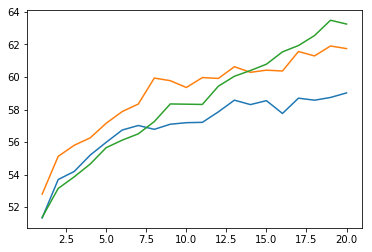

In [27]:
plt.plot(stocks_table)

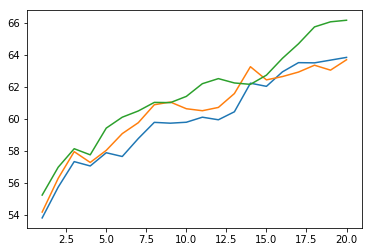

In [28]:
plt.plot(indices_table)

# Implementation of Random Forest Classifier Algorithm

In [29]:
def avg_score(x_train, y_train,x_test,y_test,trees):
    accuracy = []
    f1 = []
    rf_model = RandomForestClassifier(trees)
    for i in range(5):
        rf_model.fit(x_train,y_train)
        accuracy.append(rf_model.score(x_test,y_test))
        f1.append(f1_score(y_test,rf_model.predict(x_test), pos_label='1'))
    avg_accuracy = sum(accuracy)/len(accuracy)
    avg_f1 = sum(f1)/len(f1)
    return avg_accuracy, avg_f1

## Using Random Forest Algorithm for prediction of stock and stock price movement 

In [30]:
def stocks_accuracy(stocks, trees, period):
    table_accuracy = pd.DataFrame()
    table_f1 = pd.DataFrame()
    for j in stocks:
        accuracy_values = []
        f1_values = []
        for i in range(1,period+1):
            stocks_indicators = get_stocks_indicators(stocks, i)
            train, test = train_test_split(stocks_indicators[j])
            accuracy, f1 = avg_score(train.iloc[:,:-1],train.iloc[:,-1],test.iloc[:,:-1],test.iloc[:,-1],trees)
            accuracy_values.append(accuracy)
            f1_values.append(f1)
        table_accuracy = pd.concat([table_accuracy, pd.DataFrame({j : accuracy_values})], axis=1)
        table_f1 = pd.concat([table_f1, pd.DataFrame({j : f1_values})], axis=1)
    table_accuracy.index = range(1,period+1)
    table_f1.index = range(1,period+1)
    return table_accuracy, table_f1

def indices_accuracy(indices, trees, period):
    table_accuracy = pd.DataFrame()
    table_f1 = pd.DataFrame()
    for j in indices:
        accuracy_values = []
        f1_values = []
        for i in range(1,period+1):
            indices_indicators = get_indices_indicators(indices, i)
            train, test = train_test_split(indices_indicators[j])
            accuracy, f1 = avg_score(train.iloc[:,:-1],train.iloc[:,-1],test.iloc[:,:-1],test.iloc[:,-1],trees)
            accuracy_values.append(accuracy)
            f1_values.append(f1)
        table_accuracy = pd.concat([table_accuracy, pd.DataFrame({j : accuracy_values})], axis=1)
        table_f1 = pd.concat([table_f1, pd.DataFrame({j : f1_values})], axis=1)
    table_accuracy.index = range(1,period+1)
    table_f1.index = range(1,period+1)
    return table_accuracy, table_f1

In [31]:
stocks_accuracy_table, stocks_f1_table = stocks_accuracy(stocks, 10, 10)

In [32]:
indices_accuracy_table, indices_f1_table = indices_accuracy(indices, 10, 10)

## Graphical Representation of Accuracy and F1 scores of the used algorithm 

In [33]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0,0.5,'Average Score')

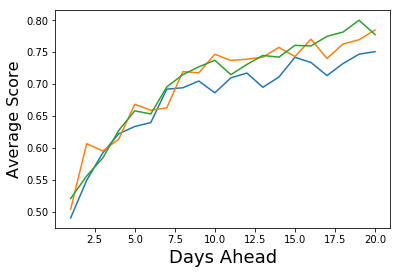

In [34]:
plt.plot(stocks_accuracy_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0,0.5,'Average Score')

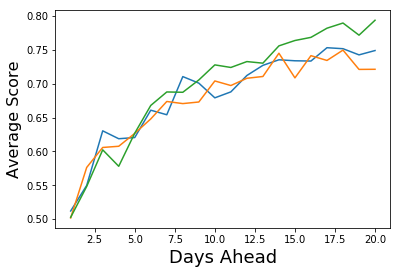

In [35]:
plt.plot(indices_accuracy_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0,0.5,'Average Score')

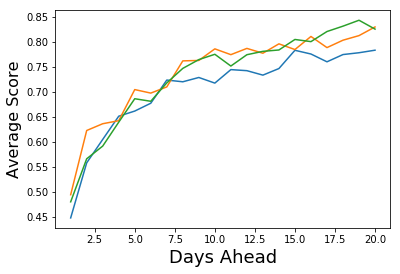

In [36]:
plt.plot(stocks_f1_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

Text(0,0.5,'Average Score')

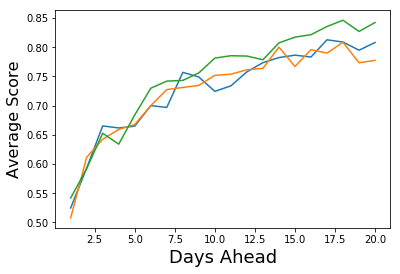

In [37]:
plt.plot(indices_f1_table)
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Days Ahead', fontsize=18)
plt.ylabel('Average Score', fontsize=16)

In [38]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

## Tabular Representation of our final calculated results 

In [39]:
stocks_accuracy_table.style.apply(highlight_max, axis=0)

,GOOG,AAPL,AMZN
1,0.490058,0.503801,0.520468
2,0.549123,0.606433,0.555848
3,0.591813,0.595029,0.583918
4,0.621962,0.61347,0.627233
5,0.633382,0.668228,0.65798
6,0.639531,0.658858,0.653001
7,0.691947,0.662665,0.695461
8,0.694135,0.719355,0.714663
9,0.704692,0.717595,0.726979
10,0.686217,0.746628,0.737243


In [40]:
indices_accuracy_table.style.apply(highlight_max, axis=0)

,DJI,GSPC,NDX
1,0.511988,0.501754,0.502632
2,0.549708,0.576316,0.548246
3,0.630409,0.605848,0.602339
4,0.618741,0.607613,0.578038
5,0.620498,0.626647,0.62694
6,0.660908,0.648023,0.667936
7,0.654173,0.673792,0.687848
8,0.710557,0.670674,0.68739
9,0.70088,0.673021,0.705572
10,0.679179,0.704106,0.727859


In [41]:
stocks_f1_table.style.apply(highlight_max, axis=0)

,GOOG,AAPL,AMZN
1,0.44784,0.494167,0.479984
2,0.5579,0.622555,0.566027
3,0.60469,0.636097,0.591409
4,0.651126,0.642184,0.639226
5,0.661408,0.704357,0.686051
6,0.677048,0.697326,0.680983
7,0.723388,0.709693,0.717696
8,0.719934,0.761718,0.746721
9,0.728537,0.762576,0.764258
10,0.717302,0.785741,0.774896


In [42]:
indices_f1_table.style.apply(highlight_max, axis=0)

,DJI,GSPC,NDX
1,0.524791,0.507719,0.541809
2,0.59316,0.611683,0.59226
3,0.665273,0.642397,0.652716
4,0.661806,0.659337,0.634101
5,0.664943,0.667711,0.684071
6,0.700013,0.700066,0.72987
7,0.697073,0.727553,0.742046
8,0.757052,0.73122,0.743293
9,0.749098,0.734733,0.756138
10,0.724461,0.751891,0.781481
